<a href="https://colab.research.google.com/github/cxbxmxcx/DeepLearningBeginnings/blob/master/DeepLearningTensorFlow_BERT_Jokes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install wget
!pip install ktrain

In [0]:
import wget

jokes_path = "stupidsuff.json"
url = 'https://raw.githubusercontent.com/taivop/joke-dataset/master/stupidstuff.json'
wget.download(url, jokes_path)

'stupidsuff (1).json'

In [0]:
import json

jokes = []
humour = []
fun_limit = 4
fun_total = 0
not_total = 0
with open(jokes_path) as json_file:
    data = json.load(json_file)
    for d in data:
      joke = d['body']
      jokes.append(joke)
      if d['rating'] > fun_limit:      
        humour.append(1)
        fun_total += 1
      else:
        humour.append(0)
        not_total += 1
print(jokes[244], humour[1066]) 
print(fun_total, not_total)  

This couple go to an agricultural show way out in the countryside a fine Sunday afternoon and are watching the auctioning off of bulls. The guy selling the bulls announces the first bull to be auctioned off, "A fine specimen, this bull reproduced 60 times last year."The wife nudges her husband in the ribs and comments, "See! That was more than 5 times a month!" The second bull is to be sold, "Another fine specimen, this wonder reproduced 120 times last year." Again the wife bugs her husband, "Hey, that's some 5 times a month. What do you say to that?" Her husband is getting really annoyed with this comparison. The third bull is up for sale, "And this extraordinary specimen reproduced 365 times last year!" The wife slaps her husband on the arm and yells, "That's once a day, every day of the year! How about you?" The husband was pretty irritated by now and yells back, "Sure, once a day! Great! But, you ask the auctioneer if they were all with the same cow!" 1
848 2925


In [0]:
cut = int(len(jokes) * 0.8)
x_train = jokes[:cut]
x_test = jokes[cut:]
y_train = humour[:cut]
y_test = humour[cut:]

In [0]:
import ktrain
from ktrain import text

(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                       x_test=x_test, y_test=y_test,
                                                                       class_names=['not','funny'],
                                                                       preprocess_mode='bert',
                                                                       ngram_range=1, 
                                                                       maxlen=500, 
                                                                       max_features=35000)

preprocessing train...
language: en


preprocessing test...
language: en


Is Multi-Label? False
maxlen is 500
done.
simulating training for different learning rates... this may take a few moments...
Train on 3018 samples
Epoch 1/1024
3018/3018 [==============================] - 241s 80ms/sample - loss: 0.6029 - acc: 0.6928
Epoch 2/1024
3018/3018 [==============================] - 235s 78ms/sample - loss: 0.5952 - acc: 0.7528
Epoch 3/1024
1542/3018 [==============>...............] - ETA: 1:54 - loss: 1.2782 - acc: 0.6933

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


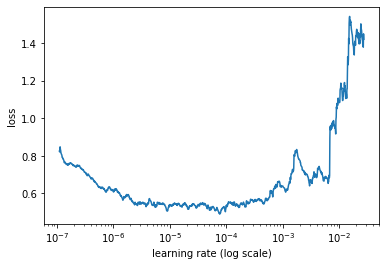

In [0]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

learner = ktrain.get_learner(model, train_data=(x_train, y_train), batch_size=6)

learner.lr_find()
learner.lr_plot()

In [0]:
learner.autofit(2e-5, 5)



begin training using triangular learning rate policy with max lr of 2e-05...
Train on 3018 samples
Epoch 1/5
3018/3018 [==============================] - 238s 79ms/sample - loss: 0.5437 - acc: 0.7664
Epoch 2/5
3018/3018 [==============================] - 236s 78ms/sample - loss: 0.5175 - acc: 0.7773
Epoch 3/5
3018/3018 [==============================] - 236s 78ms/sample - loss: 0.4785 - acc: 0.7813
Epoch 4/5
3018/3018 [==============================] - 236s 78ms/sample - loss: 0.3941 - acc: 0.8118
Epoch 5/5
3018/3018 [==============================] - 236s 78ms/sample - loss: 0.2688 - acc: 0.8933


In [0]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['not', 'funny']

In [0]:
predictor.predict('A man walked into a bar. The bartender yelled back, get out, were closed.')

'not'

In [0]:
predictor.predict('If I had a dime for every time someone called me pretty I would have 10 cents.')

'not'